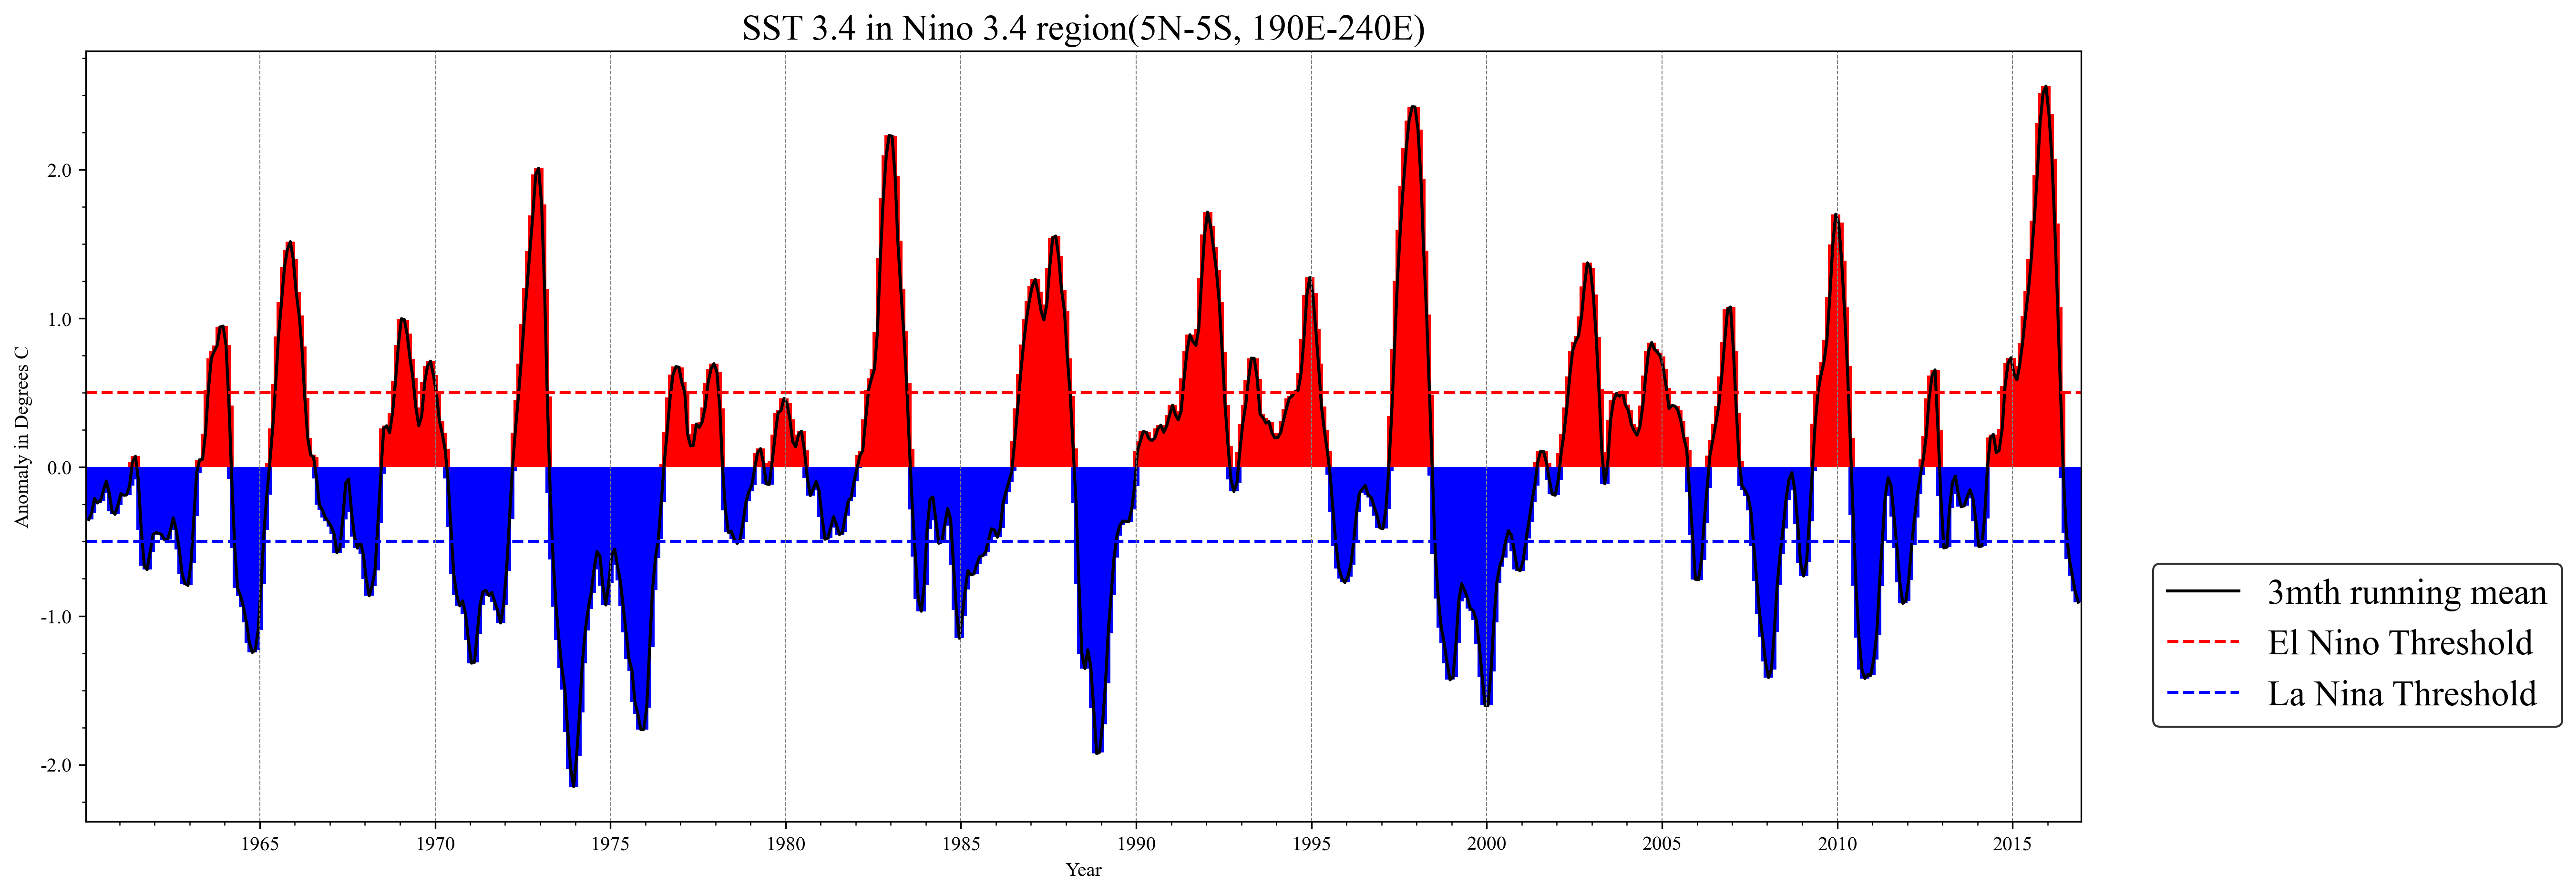

In [1]:
#1.Niño 3.4 index
import xarray as xr
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

#1.1
# Open the netCDF file using xarray
ds = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc', engine="netcdf4")

# Select the SST data for the Niño 3.4 region (5N-5S, 190E-240E)
sel_sst = ds['sst'].sel(lat=slice(-5, 5), lon=slice(190, 240))

# Compute the mean SST for the Niño 3.4 region over the latitude and longitude
mean_sst = sel_sst.mean(dim=['lat', 'lon'])

# Calculate the climatology by grouping by month
monthly_clim = mean_sst.groupby('time.month').mean('time')

# Compute anomalies by subtracting the climatology from the original SST
anom = mean_sst.groupby('time.month') - monthly_clim

#1.2
# Calculate a 3-month running mean for the anomalies
mean_anomalies_3m = anom.rolling(time=3, center=True).mean()
running_mean_anomalies = mean_anomalies_3m.sel(time=mean_anomalies_3m['time'].dt.year >= 1960)

# Convert the time coordinate to a pandas datetime index
time_index = running_mean_anomalies['time'].to_index()

# Determine the bar colors based on the anomaly values
bar_colors = ['red' if value > 0 else 'blue' for value in running_mean_anomalies]

# Plot the SST anomalies using bars
fig, ax = plt.subplots(figsize=(18, 7), dpi=300)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 15
plt.plot(time_index, running_mean_anomalies, label='3mth running mean',color='black')
ax.bar(time_index, running_mean_anomalies, width=100, color=bar_colors, linewidth=1)

# Set up the x-axis to display time in a more spaced-out manner
ax.xaxis.set_major_locator(mdates.YearLocator(5)) # Show every 10 years
ax.xaxis.set_minor_locator(mdates.YearLocator(1)) # Show every year as a minor tick
plt.xticks(rotation=0) # Rotate the x-axis labels to avoid crowding

# Add the El Niño and La Niña thresholds
plt.axhline(y=0.5, color='red', linestyle='--', label='El Nino Threshold')
plt.axhline(y=-0.5, color='blue', linestyle='--', label='La Nina Threshold')
plt.xlim(time_index[0], time_index[-1]) # Set the x-axis limits to the time period

# Set the minor ticks on the y-axis to 0.25
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# Set the format of the y-axis ticks to one decimal place
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

# Add vertical dashed lines every 5 years
for year in range(time_index[0].year, time_index[-1].year, 5):
    plt.axvline(x=mdates.date2num(datetime(year, 1, 1)), color='gray', linestyle='--', linewidth=0.5)


# Add labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Anomaly in Degrees C')
ax.set_title('SST 3.4 in Nino 3.4 region(5N-5S, 190E-240E)')

# Add a legend 
plt.legend(loc='lower right', bbox_to_anchor=(1.25, 0.1), fontsize= 'larger',edgecolor='black')  
# Show the plot
plt.show()

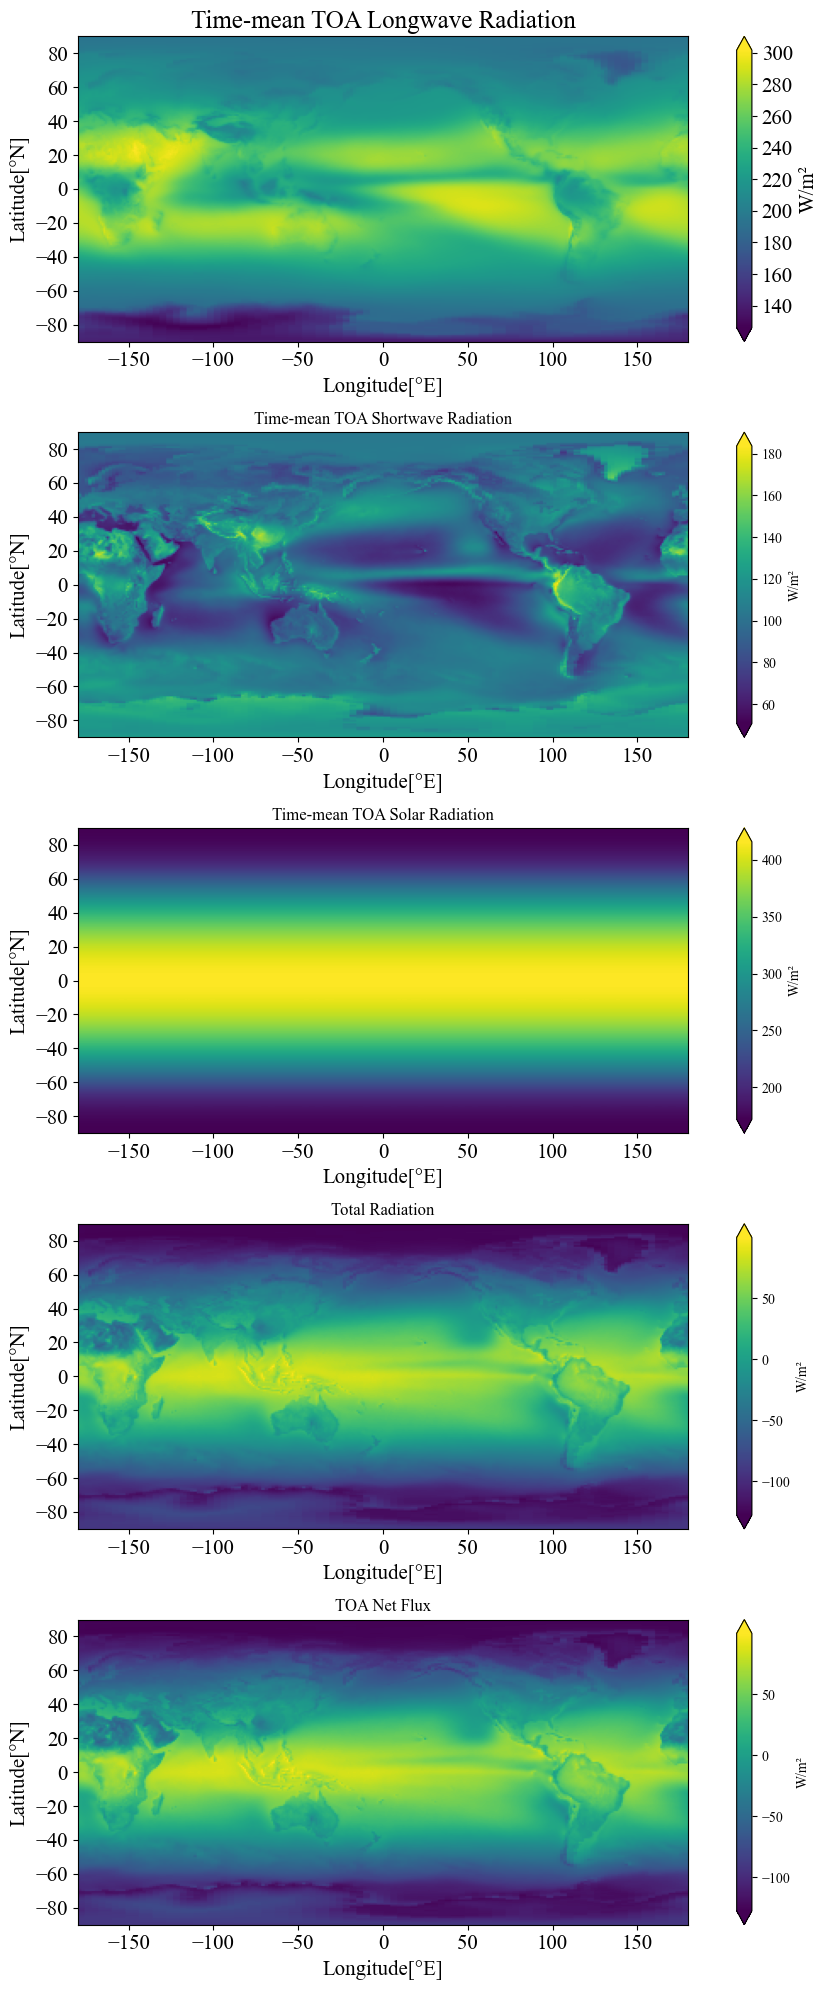

In [4]:

#2. Earth’s energy budget
#2.1
import netCDF4
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Open the dataset
ds = xr.open_dataset('CERES_EBAF-TOA_200003-201701.nc')

# Calculate the time-mean for each radiation
toa_lw_all_sky_mean = ds['toa_lw_all_mon'].mean(dim='time')
toa_sw_all_sky_mean = ds['toa_sw_all_mon'].mean(dim='time')
toa_solar_all_sky_mean = ds['solar_mon'].mean(dim='time')

# Create 5 subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 20))

# Plot the time-mean TOA longwave radiation on the first subplot
ax = axes[0]
ax.set_title('Time-mean TOA Longwave Radiation')
ax.set_ylabel('Latitude[°N]')
ax.set_xlabel('Longitude[°E]')
im = ax.imshow(toa_lw_all_sky_mean, extent=[-180,180,-90,90], origin='lower')
fig.colorbar(im, ax=ax, label='W/m²', shrink=1, extend='both')

# Adjust the font size
plt.rcParams['font.size'] = 10


# Plot the time-mean TOA shortwave radiation on the second subplot
ax = axes[1]
ax.set_title('Time-mean TOA Shortwave Radiation')
ax.set_ylabel('Latitude[°N]')
ax.set_xlabel('Longitude[°E]')
im = ax.imshow(toa_sw_all_sky_mean, extent=[-180,180,-90,90], origin='lower')
fig.colorbar(im, ax=ax, label='W/m²', shrink=1, extend='both')


# Plot the time-mean TOA solar radiation on the third subplot
ax = axes[2]
ax.set_title('Time-mean TOA Solar Radiation')
ax.set_ylabel('Latitude[°N]')
ax.set_xlabel('Longitude[°E]')
im = ax.imshow(toa_solar_all_sky_mean, extent=[-180,180,-90,90], origin='lower')
fig.colorbar(im, ax=ax, label='W/m²', shrink=1, extend='both')

# Calculate the total radiation
total_radiation = toa_solar_all_sky_mean - toa_lw_all_sky_mean - toa_sw_all_sky_mean 

# Plot the total radiation on the fourth subplot
ax = axes[3]
ax.set_title('Total Radiation')
ax.set_ylabel('Latitude[°N]')
ax.set_xlabel('Longitude[°E]')
im = ax.imshow(total_radiation, extent=[-180,180,-90,90], origin='lower')
fig.colorbar(im, ax=ax, label='W/m²', shrink=1, extend='both')

# Plot the TOA net flux on the fifth subplot
ax = axes[4]
ax.set_title('TOA Net Flux')
ax.set_ylabel('Latitude[°N]')
ax.set_xlabel('Longitude[°E]')
im = ax.imshow(ds['toa_net_all_mon'].mean(dim='time'), extent=[-180,180,-90,90], origin='lower')
fig.colorbar(im, ax=ax, label='W/m²', shrink=1, extend='both')

# Show the plot
plt.tight_layout()
plt.show()




In [85]:
ds

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 43.85 43.85 ... 0.049
    toa_lw_all_mon               (time, lat, lon) float32 139.6 139.6 ... 168.5
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 57.13 57.13 ... 0.0
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

In [6]:

#2.2
# calculate the area of each grid
area = ds['solar_mon'].sel(lat=slice(-90, 90), lon=slice(0, 360)).mean(dim='time') * 0 + 1
area *= np.cos(np.deg2rad(ds['solar_mon']['lat']))
area *= np.deg2rad(ds['solar_mon']['lon'] - ds['solar_mon']['lon'][0])
area *= 6371.009 ** 2 * 1e6

# calculate the total area of earth
earth_area = area.sum(dim=['lat', 'lon'])

# calculate the radiation of each grid 
solar_radiation = ds['solar_mon'].sel(lat=slice(-90, 90), lon=slice(0, 360)).mean(dim='time') * area
lw_radiation = ds['toa_lw_all_mon'].sel(lat=slice(-90, 90), lon=slice(0, 360)).mean(dim='time') * area
sw_radiation = ds['toa_sw_all_mon'].sel(lat=slice(-90, 90), lon=slice(0, 360)).mean(dim='time') * area

# calculate the total radiation
total_solar = solar_radiation.sum(dim=['lat', 'lon'])
total_lw = lw_radiation.sum(dim=['lat', 'lon'])
total_sw = sw_radiation.sum(dim=['lat', 'lon'])

# print the results
print('Total incoming solar radiation:', int(total_solar.values/earth_area), 'W/m^2')
print('Total outgoing longwave radiation:', int(total_lw.values/earth_area), 'W/m^2')
print('Total outgoing shortwave radiation:', int(total_sw.values/earth_area), 'W/m^2')


Total incoming solar radiation: 340 W/m^2
Total outgoing longwave radiation: 240 W/m^2
Total outgoing shortwave radiation: 98 W/m^2


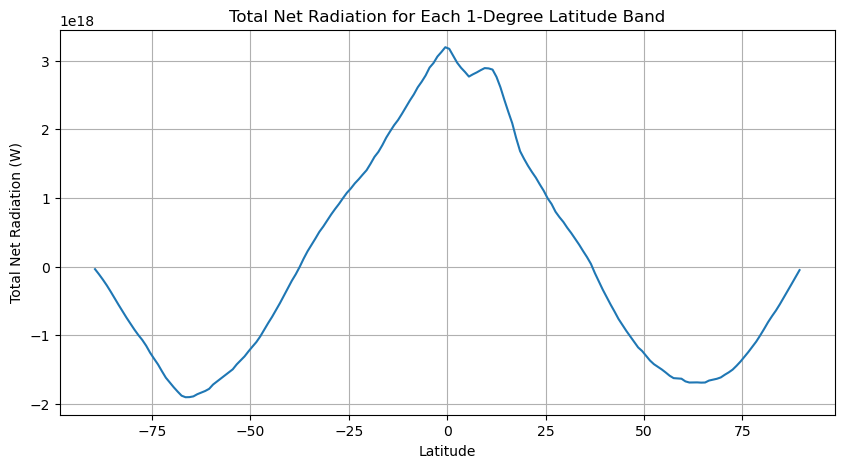

In [4]:
#2.3
import matplotlib.pyplot as plt

#calcualte the net radiation of each latitude band
net_radiation = ds['toa_net_all_mon'].mean(dim='time') * area
net_radiation_total = net_radiation.sum(dim='lon')

# show the result
plt.figure(figsize=(10, 5))
net_radiation_total.plot()
plt.title('Total Net Radiation for Each 1-Degree Latitude Band')
plt.xlabel('Latitude')
plt.ylabel('Total Net Radiation (W)')
plt.grid(True)
plt.show()


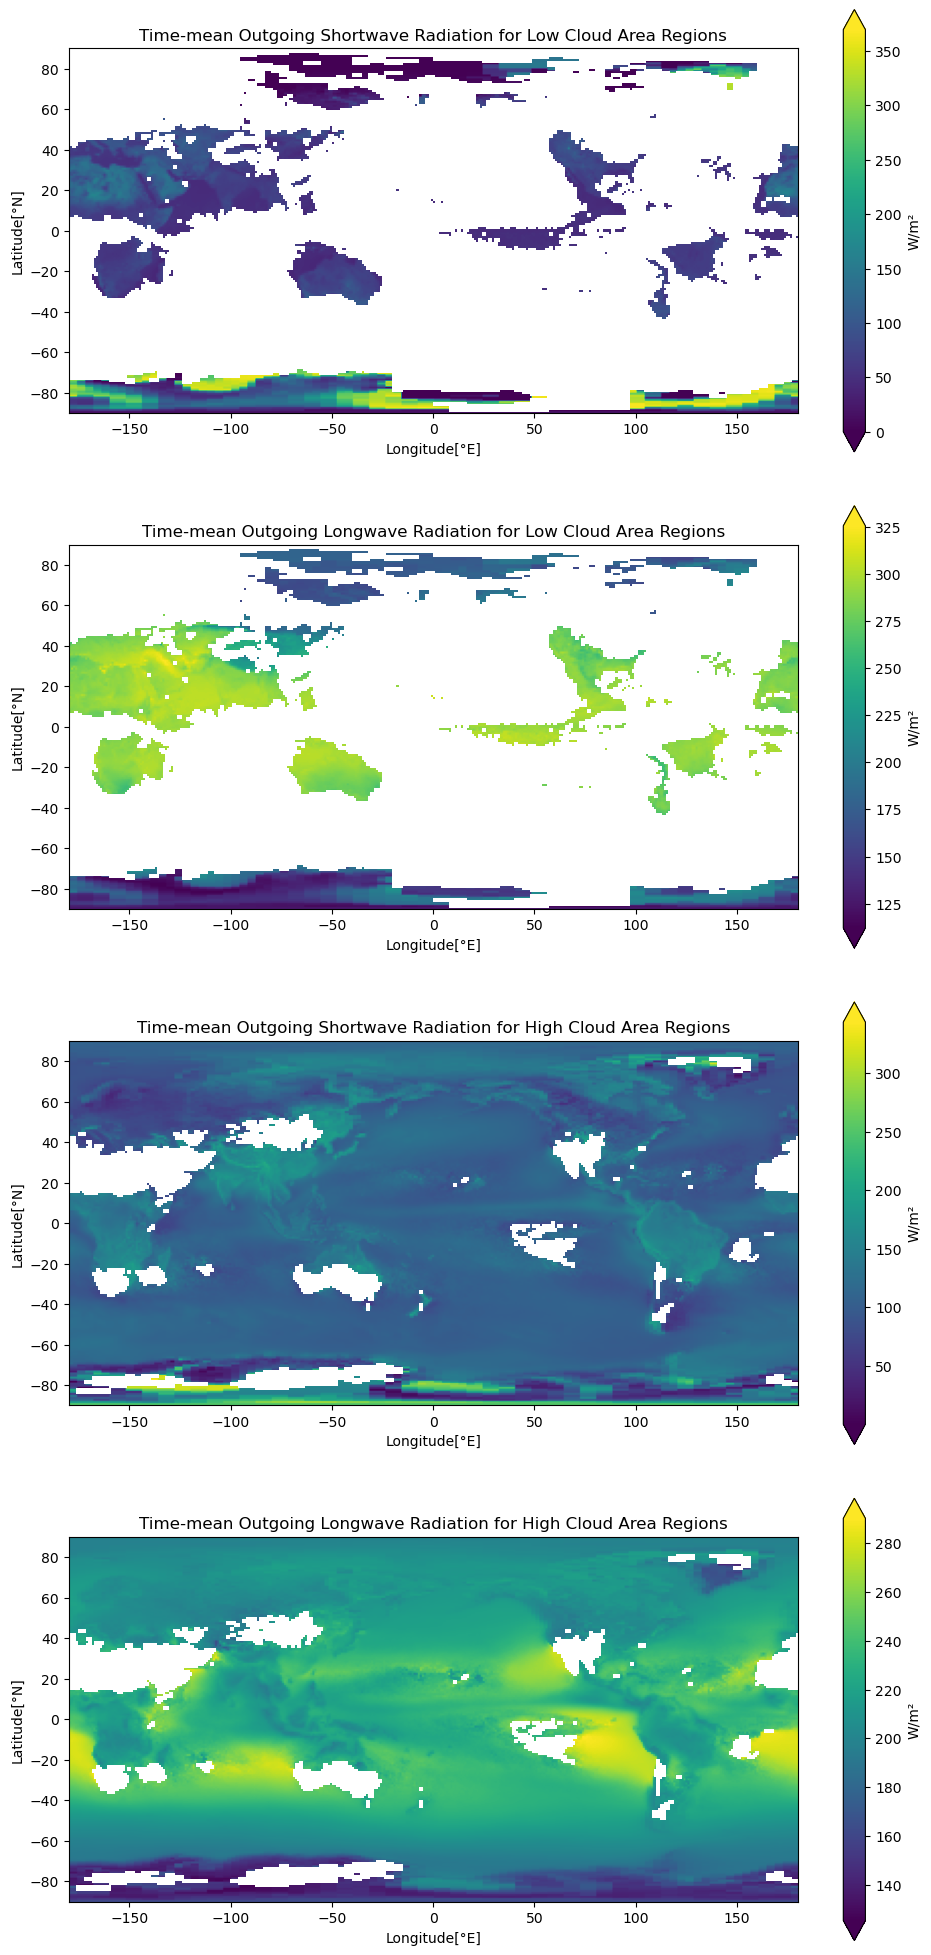

In [5]:
#2.4
# Define low and high cloud area regions
low_cloud_area = ds['cldarea_total_daynight_mon'] <= 25
high_cloud_area = ds['cldarea_total_daynight_mon'] >= 75

# Calculate the time-mean outgoing shortwave and longwave radiation for low and high cloud area regions
sw_low_cloud_area_mean = ds['toa_sw_all_mon'].where(low_cloud_area).mean(dim='time')
lw_low_cloud_area_mean = ds['toa_lw_all_mon'].where(low_cloud_area).mean(dim='time')
sw_high_cloud_area_mean = ds['toa_sw_all_mon'].where(high_cloud_area).mean(dim='time')
lw_high_cloud_area_mean = ds['toa_lw_all_mon'].where(high_cloud_area).mean(dim='time')


# Create 5 subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 20))

# Plot the Time-mean Outgoing Shortwave Radiation for Low Cloud Area Regions on the first subplot
ax = axes[0]
ax.set_title('Time-mean Outgoing Shortwave Radiation for Low Cloud Area Regions')
ax.set_ylabel('Latitude[°N]')
ax.set_xlabel('Longitude[°E]')
im = ax.imshow(sw_low_cloud_area_mean, extent=[-180,180,-90,90], origin='lower')
fig.colorbar(im, ax=ax, label='W/m²', shrink=1, extend='both')


# Plot the Time-mean Outgoing Longwave Radiation for Low Cloud Area Regions on the second subplot
ax = axes[1]
ax.set_title('Time-mean Outgoing Longwave Radiation for Low Cloud Area Regions')
ax.set_ylabel('Latitude[°N]')
ax.set_xlabel('Longitude[°E]')
im = ax.imshow(lw_low_cloud_area_mean, extent=[-180,180,-90,90], origin='lower')
fig.colorbar(im, ax=ax, label='W/m²', shrink=1, extend='both')


# Plot the time-mean outgoing shortwave radiation for high cloud area regions on the third subplot
ax = axes[2]
ax.set_title('Time-mean Outgoing Shortwave Radiation for High Cloud Area Regions')
ax.set_ylabel('Latitude[°N]')
ax.set_xlabel('Longitude[°E]')
im = ax.imshow(sw_high_cloud_area_mean, extent=[-180,180,-90,90], origin='lower')
fig.colorbar(im, ax=ax, label='W/m²', shrink=1, extend='both')


# Plot the time-mean outgoing longwave radiation for high cloud area regions on the fourth subplot
ax = axes[3]
ax.set_title('Time-mean Outgoing Longwave Radiation for High Cloud Area Regions')
ax.set_ylabel('Latitude[°N]')
ax.set_xlabel('Longitude[°E]')
im = ax.imshow(lw_high_cloud_area_mean, extent=[-180,180,-90,90], origin='lower')
fig.colorbar(im, ax=ax, label='W/m²', shrink=1, extend='both')


# Show the plot
plt.tight_layout()
plt.show()



In [7]:
#2.5
# Calculate the global mean outgoing shortwave and longwave radiation for low and high cloud area regions
sw_low_cloud_area_mean = ds['toa_sw_all_mon'].where(low_cloud_area).mean()
lw_low_cloud_area_mean = ds['toa_lw_all_mon'].where(low_cloud_area).mean()
sw_high_cloud_area_mean = ds['toa_sw_all_mon'].where(high_cloud_area).mean()
lw_high_cloud_area_mean = ds['toa_lw_all_mon'].where(high_cloud_area).mean()


# print the result
print('Global mean shortwave radiation in low cloud regions:', int(sw_low_cloud_area_mean.values), 'W/m^2')
print('Global mean longwave radiation in low cloud regions:', int(lw_low_cloud_area_mean.values), 'W/m^2')
print('Global mean shortwave radiation in high cloud regions:', int(sw_high_cloud_area_mean), 'W/m^2')
print('Global mean longwave radiation in high cloud regions:', int(lw_high_cloud_area_mean.values), 'W/m^2')



Global mean shortwave radiation in low cloud regions: 97 W/m^2
Global mean longwave radiation in low cloud regions: 247 W/m^2
Global mean shortwave radiation in high cloud regions: 111 W/m^2
Global mean longwave radiation in high cloud regions: 215 W/m^2


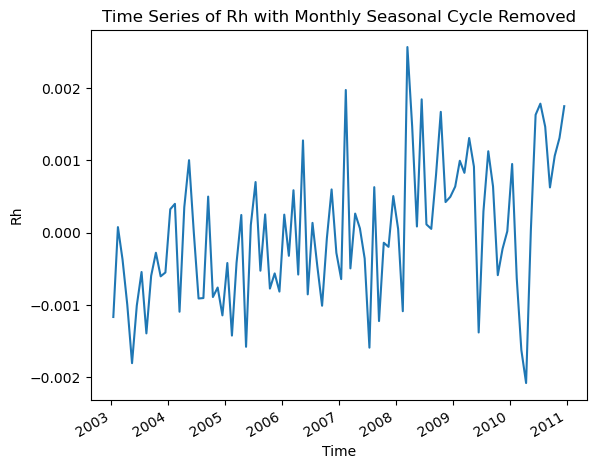

<xarray.Dataset>
Dimensions:    (longitude: 720, latitude: 360, time: 96, bounds: 2)
Coordinates:
  * longitude  (longitude) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * latitude   (latitude) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * time       (time) datetime64[ns] 2003-01-16T12:00:00 ... 2010-12-16T12:00:00
Dimensions without coordinates: bounds
Data variables:
    NPP        (time, latitude, longitude) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Rh         (time, latitude, longitude) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    NEE        (time, latitude, longitude) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    FIRE       (time, latitude, longitude) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    FUEL       (time, latitude, longitude) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    time_bds   (time, bounds) datetime64[ns] 2003-01-01 ... 2011-01-01
Attributes: (12/24)
    Conventions:                    CF-1.7
    title:                          2003 GEOS-Carb CASA-GFED3 Monthly Ecosyst...
    source:                         CASA-GFED3 Model using MERRA-2 meteorology
    contact:                        Lesley Ott Lesley.Ott@nasa.gov
    history:                        Files written by IDL
    institution:                    NASA Global Modeling and Assimilation Office
    ...                             ...
    NorthernmostLatiude:            90.0
    WesternmostLongitude:           -180.0
    SouthernmostLatitude:           -90.0
    EasternmostLongitude:           180.0
    ProcessingLevel:                4
    comment:                        Produced using CASA-GFED3 Model with MERR...

In [2]:
#3 Explore a netCDF dataset
#3.1
import xarray as xr
import matplotlib.pyplot as plt

# List of file names
files = ["GEOSCarb_CASAGFED3v3_Flux.Monthly.x720_y360.2003.nc", "GEOSCarb_CASAGFED3v3_Flux.Monthly.x720_y360.2004.nc", "GEOSCarb_CASAGFED3v3_Flux.Monthly.x720_y360.2005.nc", "GEOSCarb_CASAGFED3v3_Flux.Monthly.x720_y360.2006.nc", 
         "GEOSCarb_CASAGFED3v3_Flux.Monthly.x720_y360.2007.nc", "GEOSCarb_CASAGFED3v3_Flux.Monthly.x720_y360.2008.nc", "GEOSCarb_CASAGFED3v3_Flux.Monthly.x720_y360.2009.nc", "GEOSCarb_CASAGFED3v3_Flux.Monthly.x720_y360.2010.nc"]

# Open the datasets
datasets = [xr.open_dataset(f) for f in files]

# Concatenate the datasets
ds_combined = xr.concat(datasets, dim='time')

# Select the variable 'Rh' from the dataset
Rh_China = ds_combined.Rh.sel(latitude=slice(3.51, 53.55), longitude=slice(73.66, 135.05))

# Remove the monthly seasonal cycle
Rh_deseasonalized = Rh_China.groupby('time.month') - Rh_China.groupby('time.month').mean()


# Plot the time series with the monthly seasonal cycle removed
Rh_deseasonalized.mean(dim=["latitude","longitude"]).plot()
plt.title('Time Series of Rh with Monthly Seasonal Cycle Removed')
plt.ylabel('Rh')
plt.xlabel('Time')
plt.show()
ds_combined

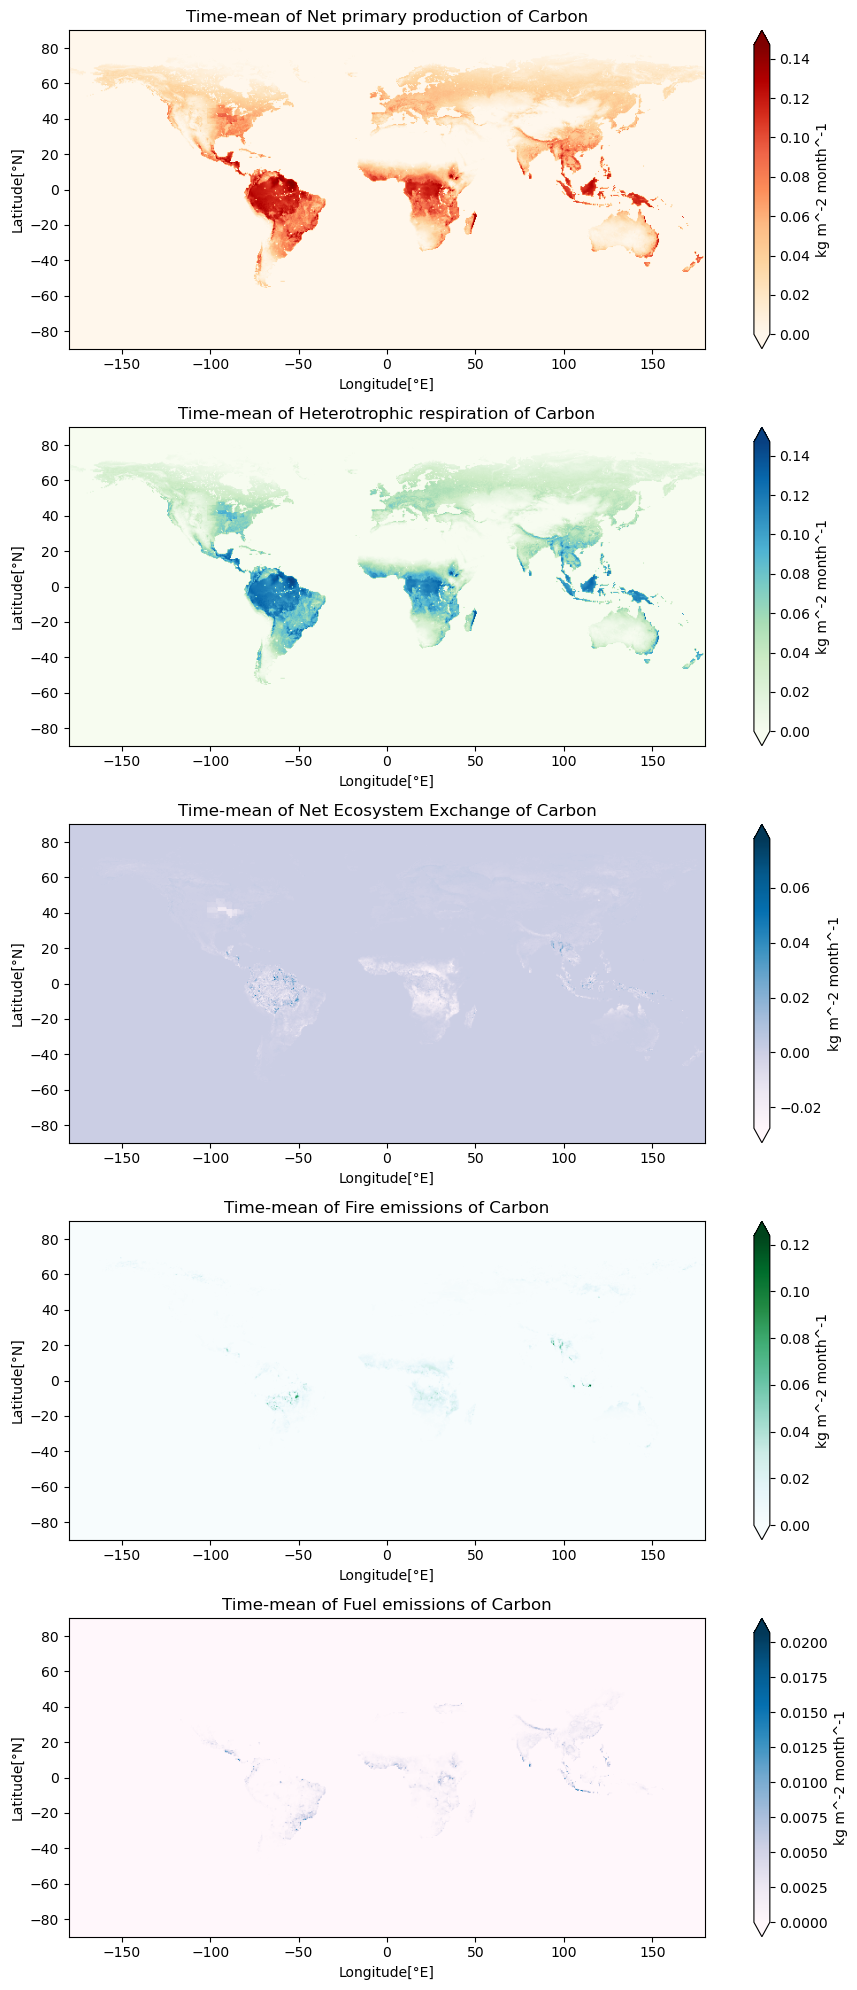

In [26]:
#3.2
# Select the variable from the dataset
NPP = ds_combined['NPP']
Rh = ds_combined['Rh']
NEE = ds_combined['NEE']
FIRE = ds_combined['FIRE']
FUEL = ds_combined['FUEL']

# Calculate the time-mean of variable
NPP_time_mean = NPP.mean(dim='time')
Rh_time_mean = Rh.mean(dim='time')
NEE_time_mean = NEE.mean(dim='time')
FIRE_time_mean = FIRE.mean(dim='time')
FUEL_time_mean = FUEL.mean(dim='time')

# Create 5 subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 20))


# #Make a 2D plot of the time-mean of 'NPP'
ax = axes[0]
ax.set_title('Time-mean of Net primary production of Carbon')
ax.set_ylabel('Latitude[°N]')
ax.set_xlabel('Longitude[°E]')
im = ax.imshow(NPP_time_mean, extent=[-180,180,-90,90], origin='lower',cmap='OrRd')
fig.colorbar(im, ax=ax, label='kg m^-2 month^-1', shrink=1, extend='both')


# Make 2D plots of the time-mean of 'Rh'
ax = axes[1]
ax.set_title('Time-mean of Heterotrophic respiration of Carbon')
ax.set_ylabel('Latitude[°N]')
ax.set_xlabel('Longitude[°E]')
im = ax.imshow(NPP_time_mean, extent=[-180,180,-90,90], origin='lower',cmap='GnBu')
fig.colorbar(im, ax=ax, label='kg m^-2 month^-1', shrink=1, extend='both')



# Make 2D plots of the time-mean of 'NEE'
ax = axes[2]
ax.set_title('Time-mean of Net Ecosystem Exchange of Carbon')
ax.set_ylabel('Latitude[°N]')
ax.set_xlabel('Longitude[°E]')
im = ax.imshow(NEE_time_mean, extent=[-180,180,-90,90], origin='lower',cmap='PuBu')
fig.colorbar(im, ax=ax, label='kg m^-2 month^-1', shrink=1, extend='both')

# Make 2D plots of the time-mean of 'FIRE'
ax = axes[3]
ax.set_title('Time-mean of Fire emissions of Carbon')
ax.set_ylabel('Latitude[°N]')
ax.set_xlabel('Longitude[°E]')
im = ax.imshow(FIRE_time_mean, extent=[-180,180,-90,90], origin='lower',cmap='BuGn')
fig.colorbar(im, ax=ax, label='kg m^-2 month^-1', shrink=1, extend='both')

# Make a 2D plot of the time-mean of FUEL'
ax = axes[4]
ax.set_title('Time-mean of Fuel emissions of Carbon')
ax.set_ylabel('Latitude[°N]')
ax.set_xlabel('Longitude[°E]')
im = ax.imshow(FUEL_time_mean, extent=[-180,180,-90,90], origin='lower',cmap='PuBu')
fig.colorbar(im, ax=ax, label='kg m^-2 month^-1', shrink=1, extend='both')



# Show the plot
plt.tight_layout()
plt.show()